In [1]:
# Import functions and libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy
import imageio

from numpy import pi, sin, zeros, r_
from scipy import signal, misc # pip install Pillow
from PIL import Image

import matplotlib.pylab as pylab

%matplotlib inline
pylab.rcParams['figure.figsize'] = (20.0, 7.0)

In [2]:
# im = imageio.imread("Lionel_Messi_512_769.jpg").astype(float)
# f = plt.figure()
# plt.imshow(im, cmap='gray')
# im.shape

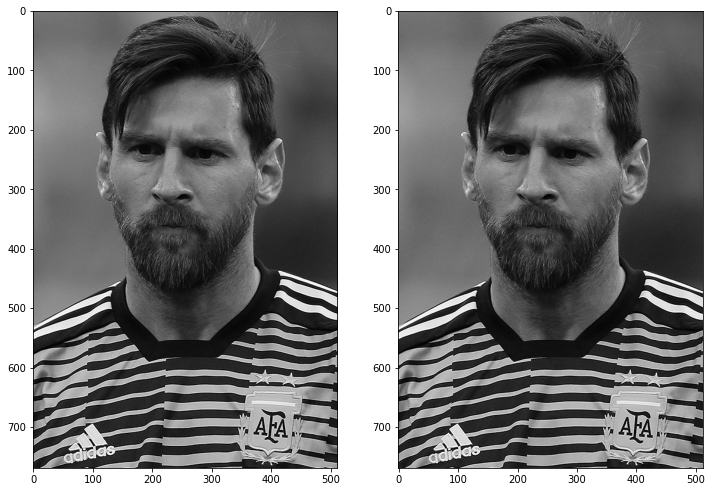

Text(0.5, 0.98, 'Comparison between Cover and Stego compressed images on Greyscale')

<Figure size 1440x504 with 0 Axes>

In [3]:
image = Image.open("Lionel_Messi_512_769.jpg").convert("L")
image_stego = Image.open("Lionel_Messi_stego.jpg").convert("L")
# image = Image.open("Lionel_Messi_resized.jpg").convert("L")
im = np.asarray(image).astype(float)
im_stego = np.asarray(image_stego).astype(float)
# plt.figure()

# f, axarr = plt.subplots(1,2)
# axarr[0,0].imshow(im, cmap='gray', vmin=0, vmax=255)
# axarr[0,1].imshow(im_stego, cmap='gray', vmin=0, vmax=255)

_, axs = plt.subplots(1, 2, figsize=(12, 12))
axs = axs.flatten()
imgs = [im, im_stego]
for img, ax in zip(imgs, axs):
    ax.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()
plt.suptitle("Comparison between Cover and Stego compressed images on Greyscale")

# im.shape
# im.size

In [4]:
def dct2(a):
    return scipy.fft.dct( scipy.fft.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

def idct2(a):
    return scipy.fft.idct( scipy.fft.idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

In [5]:
#For cover image
imsize = im.shape
dct = np.zeros(imsize)

# Do 8x8 DCT on image (in-place)
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        dct[i:(i+8),j:(j+8)] = dct2( im[i:(i+8),j:(j+8)] )
        

#For stego image
imsize = im_stego.shape
dct_stego = np.zeros(imsize)

# Do 8x8 DCT on stego image (in-place)
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        dct_stego[i:(i+8),j:(j+8)] = dct2( im_stego[i:(i+8),j:(j+8)] )



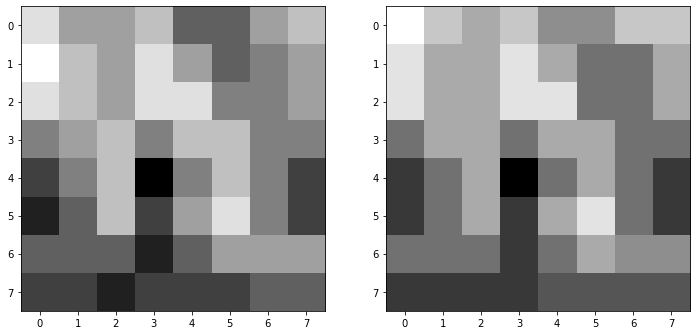

<Figure size 1440x504 with 0 Axes>

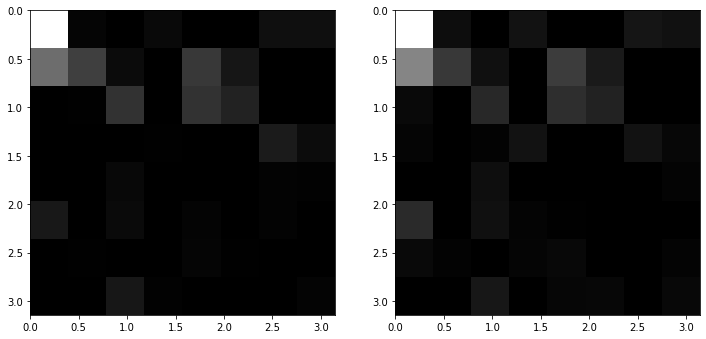

Text(0.5, 0.98, 'An 8x8 DCT block from the Cover and the Stego')

<Figure size 1440x504 with 0 Axes>

In [6]:
pos = 0

_, axs = plt.subplots(1, 2, figsize=(12, 12))
axs = axs.flatten()
imgs = [im, im_stego]
for img, ax in zip(imgs, axs):
    ax.imshow(img[pos:pos+8,pos:pos+8], cmap='gray')
plt.show()
plt.suptitle("An 8x8 Image block from the Cover and the Stego")


# Extract a block from image
# plt.figure()
# plt.imshow(np.hstack((im[pos:pos+8,pos:pos+8], im_stego[pos:pos+8,pos:pos+8])),cmap='gray')
# plt.title( "An 8x8 Image block")

_, axs = plt.subplots(1, 2, figsize=(12, 12))
axs = axs.flatten()
dct_array = [dct, dct_stego]
for dct, ax in zip(dct_array, axs):
    ax.imshow(dct[pos:pos+8,pos:pos+8], cmap='gray', vmax= np.max(dct)*0.01,vmin = 0, extent=[0,pi,pi,0])
plt.show()
plt.suptitle("An 8x8 DCT block from the Cover and the Stego")
                        
# Display the dct of that block
# plt.figure()
# plt.imshow(np.hstack((dct[pos:pos+8,pos:pos+8],dct_stego[pos:pos+8,pos:pos+8])),cmap='gray',vmax= np.max(dct)*0.01,vmin = 0, extent=[0,pi,pi,0])
# plt.title( "An 8x8 DCT block")


# Extract a block from stego image
# plt.figure()
# plt.imshow(im_stego[pos:pos+8,pos:pos+8],cmap='gray')
# plt.title( "An 8x8 Image block")

# Display the dct of that block
# plt.figure()
# plt.imshow(dct_stego[pos:pos+8,pos:pos+8],cmap='gray',vmax= np.max(dct_stego)*0.01,vmin = 0, extent=[0,pi,pi,0])
# plt.title( "An 8x8 DCT block")

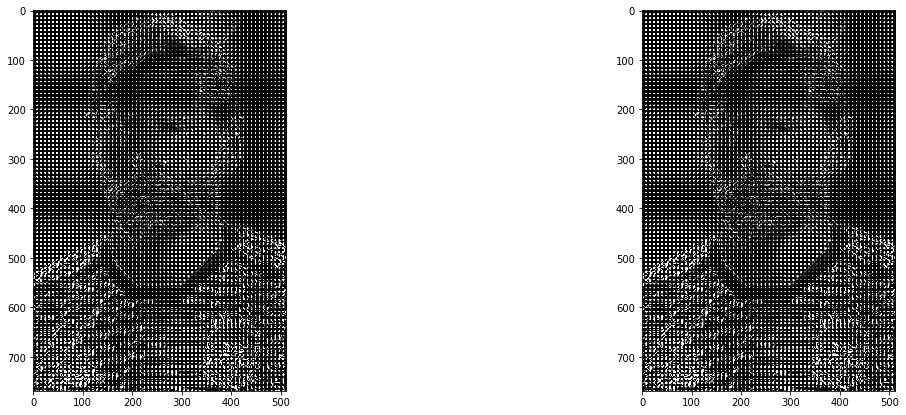

Text(0.5, 0.98, 'Entire DCT of the Cover and the Stego')

<Figure size 1440x504 with 0 Axes>

In [7]:
# Display entire DCT

_, axs = plt.subplots(1, 2)
axs = axs.flatten()
for dct, ax in zip(dct_array, axs):
    ax.imshow(dct,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.show()
plt.suptitle("Entire DCT of the Cover and the Stego")

# plt.figure()
# plt.imshow(np.hstack((dct,dct_stego)),cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
# plt.title( "8x8 DCTs of the image")

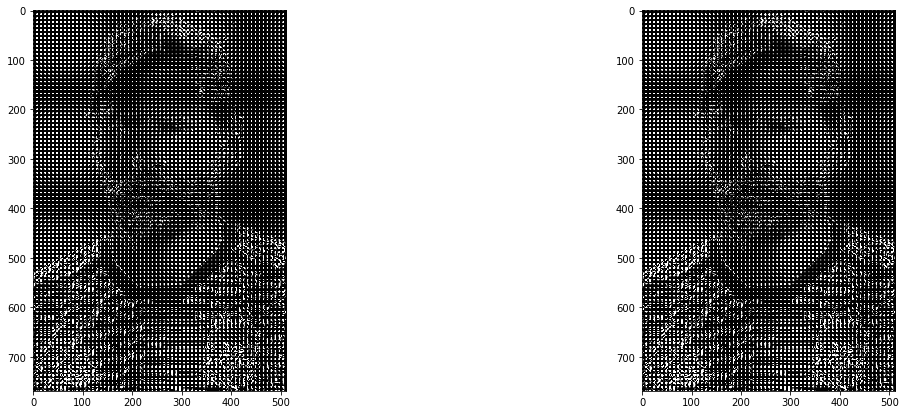

Keeping only 10.887211475942783 % of the DCT coefficients


43310.08

In [15]:
# Threshold
thresh = 0.012
dct_thresh = dct * (abs(dct) > (thresh*np.max(dct)))
dct_stego_thresh = dct_stego * (abs(dct_stego) > (thresh*np.max(dct_stego)))

dct_thresh_array = [dct_thresh, dct_stego_thresh]

_, axs = plt.subplots(1, 2)
axs = axs.flatten()
for dct_thresh, ax in zip(dct_thresh_array, axs):
    ax.imshow(dct_thresh, cmap='gray', vmax = np.max(dct)*0.01, vmin = 0)
plt.show()


# plt.figure()
# plt.imshow(np.hstack((dct_thresh, dct_stego_thresh)),cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
# plt.title( "Thresholded 8x8 DCTs of the image")

percent_nonzeros = np.sum( dct_thresh != 0.0 ) / (imsize[0]*imsize[1]*1.0)

# print "Keeping only %f%% of the DCT coefficients" % (percent_nonzeros*100.0)
print("Keeping only", percent_nonzeros*100.0,"% of the DCT coefficients")
dct_thresh.size*0.11

Text(0.5, 1.0, 'Comparison between original and DCT compressed images')

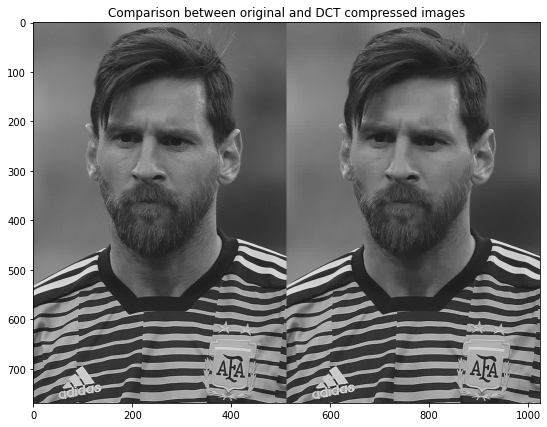

In [9]:
im_dct = np.zeros(imsize)

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        im_dct[i:(i+8),j:(j+8)] = idct2( dct_thresh[i:(i+8),j:(j+8)] )
        
        
plt.figure()
plt.imshow( np.hstack( (im, im_dct) ) ,cmap='gray')
plt.title("Comparison between original and DCT compressed images" )